This python script uses a multilayer perceptron regressor to model the data for the interaction of two signals in an optical fiber. The target variable is the energy E. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import pickle # to save the model

## Load the dataset

In [2]:
df = pd.read_csv('Data-Energy.dat')

## Explore the dataset

In [3]:
df.head()

,B2,G,DO,Dz,P1,P2,E
0,0.0050,0.002,5,0.5,100,10,0.794660
1,0.0075,0.002,5,0.5,100,10,1.306685
2,0.0100,0.002,5,0.5,100,10,1.565490
3,0.0150,0.002,5,0.5,100,10,1.743379
4,0.0200,0.002,5,0.5,100,10,1.789472


In [4]:
df.describe()

,B2,G,DO,Dz,P1,P2,E
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.019360,0.001965,5.209302,0.467442,91.627907,15.232558,1.557556
std,0.003822,0.000334,0.832613,0.110671,20.345847,13.970781,1.017889
min,0.005000,0.000500,4.000000,0.000000,20.000000,5.000000,0.000000
25%,0.020000,0.002000,5.000000,0.500000,100.000000,10.000000,0.780392
50%,0.020000,0.002000,5.000000,0.500000,100.000000,10.000000,1.460797
75%,0.020000,0.002000,5.000000,0.500000,100.000000,10.000000,2.116922
max,0.030000,0.003000,9.000000,0.600000,100.000000,70.000000,4.323701


In [5]:
df = df.sample(frac=1) # to shuffle the dataset

## Correlation with target variable

In [6]:
df.corr()['E'].abs().sort_values(ascending=False)

E     1.000000
P2    0.787279
P1    0.462497
Dz    0.358922
G     0.289597
DO    0.185260
B2    0.101498
Name: E, dtype: float64

## Select the features

In [7]:
cols = df.columns.values
cols

array(['B2', 'G', 'DO', 'Dz', 'P1', 'P2', 'E'], dtype=object)

In [8]:
x = df[cols[0:6]] # B2, G, DO, Dz, P1, P2
y = df[cols[6]] # E

## Split into train and test sets

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

## Scale the features

In [10]:
#Standardize features by removing the mean and scaling to unit variance. 
#Always do it when using stochastic gradient descent.
x_scaler = StandardScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.transform(x_test)

## Hyperparameter optimization with cross-validation

In [11]:
estimator =  MLPRegressor(hidden_layer_sizes = (20), solver='lbfgs')

#alpha : L2 penalty parameter.

parameters ={'alpha': [0.001, 0.01,0.1,1,10]}

grid_search = GridSearchCV(estimator, parameters, cv =5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [12]:
grid_search.best_score_

0.98709101674006039

In [13]:
 grid_search.best_params_

{'alpha': 0.01}

## Evaluate the best model

In [14]:
model = grid_search.best_estimator_
#model.fit(x_train, y_train)

In [15]:
model.score(x_test,y_test)

0.99025819920347513

## Make predictions using the best model

In [16]:
y_pred = model.predict(x_test)

## Compare data with prediction

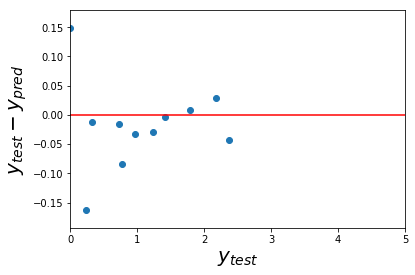

In [17]:
plt.scatter(y_test, (y_test - y_pred))
plt.plot([0,5],[0,0],c='r')
plt.xlim([0,5])
plt.xlabel('$y_{test}$',fontsize=20)
plt.ylabel('$y_{test}-y_{pred}$',fontsize=20)
plt.show()

## Save and load the model

In [18]:
pickle.dump(model, open('model.sav','w'))

In [19]:
loaded_model = pickle.load(open('model.sav', 'r'))

In [20]:
loaded_model.predict(x_test)

array([ 1.00345062,  1.78125831,  2.14184272,  1.4206739 ,  0.74418139,
        0.39561725, -0.1481229 ,  0.84997654,  2.40961703,  1.26271985,
        0.32878726])

In [21]:
loaded_model.score(x_test,y_test)

0.99025819920347513